In [2]:
# Import the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [3]:
# Read in cleaned data csv
reddit_df = pd.read_csv("combined_cleaned_500k.csv")

In [4]:
reddit_df.head()

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation
0,i think most singaporeans dont give a damn who...,2020-04-11 15:49:23,invigo79,/r/singapore/comments/fz7vtl/im_quite_interest...,t3_fz7vtl,t3_fz7vtl,fn3gbrg,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '..."
1,fair point the secrecy aspect of it slipped my...,2020-04-03 09:59:08,potatetoe_tractor,/r/singapore/comments/fu3axm/government_to_tab...,t3_fu3axm,t1_fmasya5,fmau5k3,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '..."
2,range,2020-02-15 15:07:03,CrossfittJesus,/r/singapore/comments/f4ac70/what_is_ps_defens...,t3_f4ac70,t3_f4ac70,fhp05xc,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '..."
3,gt this is binary thinking because you think t...,2020-06-04 07:07:39,nomad80,/r/singapore/comments/gw55cx/notoracism/fsu4fyd/,t3_gw55cx,t1_fsu3dsf,fsu4fyd,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '..."
4,boo boo poor u lmao,2020-10-31 13:52:12,pirorok,/r/singapore/comments/jl6abo/rsingapore_random...,t3_jl6abo,t1_gap4e9y,gap4vkl,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, '..."


## Checking Data

In [5]:
# Check data type of 'text' column
reddit_df['text'].dtype

dtype('O')

In [6]:
# Number of non-null rows in the 'text' column
row_count1 = reddit_df['text'].count() #only counts non-null rows
print(f"Number of rows in the 'text' column: {row_count1}")

# Number of rows (including null rows) in the 'text' column
row_count2 = len(reddit_df['text']) #includes NaN values
print(f"Total number of rows in the 'text' column: {row_count2}") 

# Calculate the square root of row_count2 and round to a whole number
sqrt_row_count2 = round(math.sqrt(row_count2))
print(f"Square root of total number of rows in the 'text' column (rounded): {sqrt_row_count2}")

Number of rows in the 'text' column: 395142
Total number of rows in the 'text' column: 396298
Square root of total number of rows in the 'text' column (rounded): 630


In [7]:
# Get a row with a null value in the 'text' column
null_row = reddit_df[reddit_df['text'].isnull()]

# Print the first row with a null value
if not null_row.empty:
    print(null_row.iloc[0])
else:
    print("No null values found in the 'text' column.")

text                                                          NaN
timestamp                                     2020-08-05 11:44:55
username                                           time_splitterz
link            /r/singapore/comments/i43rkj/a_conversation_wi...
link_id                                                 t3_i43rkj
parent_id                                               t3_i43rkj
id                                                        g0fmxbd
subreddit_id                                             t5_2qh8c
moderation      {'removal_reason': None, 'collapsed': False, '...
Name: 12, dtype: object


## Formating Data for Visualisation

In [8]:
# Count the number of words in each row of the 'text' column
reddit_df['word_count'] = reddit_df['text'].apply(lambda x: len(str(x).split()))

In [9]:
pd.set_option('display.max_colwidth', None) # Does not truncate 'text' column
reddit_df.head()

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation,word_count
0,i think most singaporeans dont give a damn who taiwan belong to,2020-04-11 15:49:23,invigo79,/r/singapore/comments/fz7vtl/im_quite_interested_to_know_why_so_many/fn3gbrg/,t3_fz7vtl,t3_fz7vtl,fn3gbrg,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, 'collapsed_reason': None, 'controversiality': 0}",12
1,fair point the secrecy aspect of it slipped my mind,2020-04-03 09:59:08,potatetoe_tractor,/r/singapore/comments/fu3axm/government_to_table_bill_to_ensure_safe_general/fmau5k3/,t3_fu3axm,t1_fmasya5,fmau5k3,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, 'collapsed_reason': None, 'controversiality': 0}",10
2,range,2020-02-15 15:07:03,CrossfittJesus,/r/singapore/comments/f4ac70/what_is_ps_defense_imprest/fhp05xc/,t3_f4ac70,t3_f4ac70,fhp05xc,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, 'collapsed_reason': None, 'controversiality': 0}",1
3,gt this is binary thinking because you think that im inherently blind and because of the majority privilege\n\ngt this demonstrates your inability to accept opposing views and have no choice but to resort to using ad hominem by casting me into an opposing the others group making it a black and white binary argument in order to have an attempt in giving supposed strength to your argument\n\nwell this is clearly very complicated for you but to bring this back to where i came in the idea of normalizing edmws tone amp tenor just because you think it is anywhere commendable that they bash anyone outside their approved groups\n\nto which all i said was \n\ngt racist against everyone sounds the worst cesspool of assholes then\n\nany other place this would be a open shut point but and here we are with your spirited defense of this mindset,2020-06-04 07:07:39,nomad80,/r/singapore/comments/gw55cx/notoracism/fsu4fyd/,t3_gw55cx,t1_fsu3dsf,fsu4fyd,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, 'collapsed_reason': None, 'controversiality': 0}",149
4,boo boo poor u lmao,2020-10-31 13:52:12,pirorok,/r/singapore/comments/jl6abo/rsingapore_random_discussion_and_small_questions/gap4vkl/,t3_jl6abo,t1_gap4e9y,gap4vkl,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, 'collapsed_reason': None, 'controversiality': 0}",5


## Visualisation: All Data (2020 - 2022)

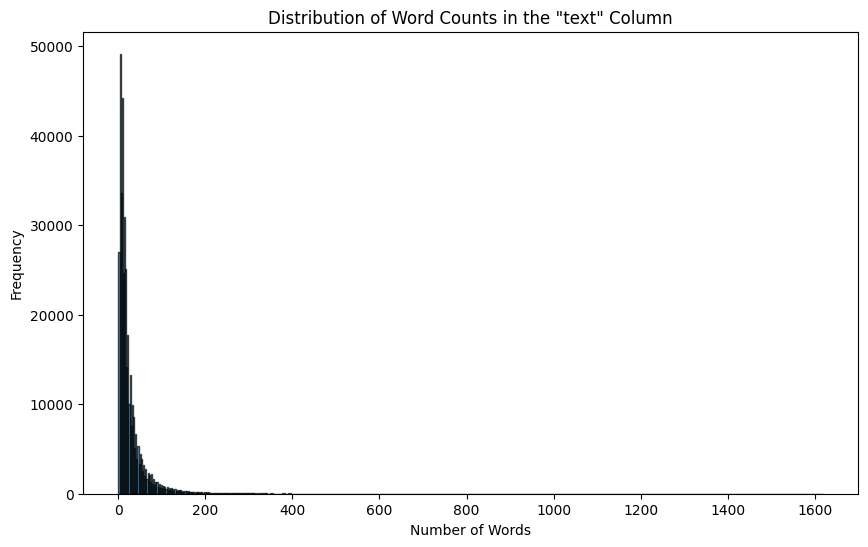

In [10]:
# Plot the distribution of word counts
plt.figure(figsize=(10, 6))
plt.hist(reddit_df['word_count'], bins=629, edgecolor='black', alpha=0.7) # Number of bins = sq root of total number of rows
plt.title('Distribution of Word Counts in the "text" Column')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

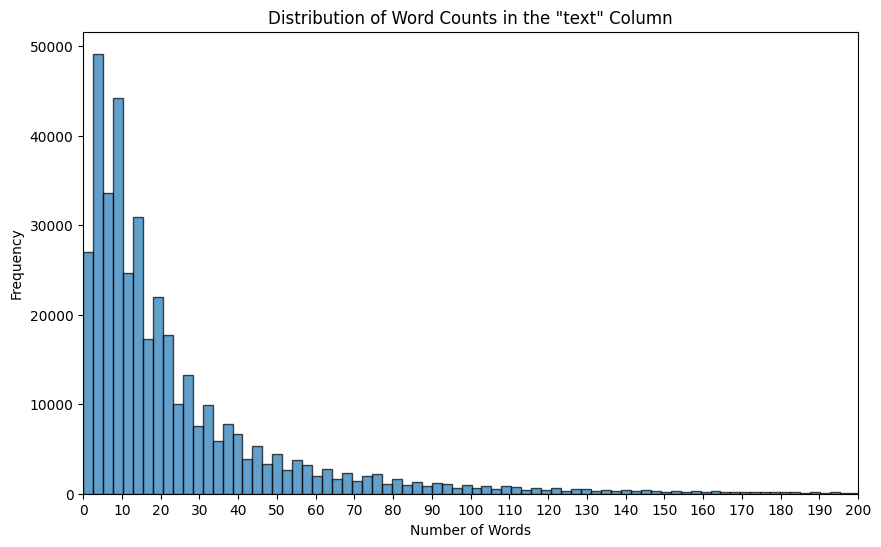

In [11]:
# Plot the distribution of word counts
plt.figure(figsize=(10, 6))
plt.hist(reddit_df['word_count'], bins= sqrt_row_count2, edgecolor='black', alpha=0.7) # Number of bins = sq root of total number of rows
plt.title('Distribution of Word Counts in the "text" Column')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.xlim(0, 200)  # Set x-axis limits
plt.xticks(np.arange(0, 210, 10))  # Set ticks at intervals of 20
plt.grid(False)
plt.show()

### Descriptive Statistics

In [12]:
# Calculate the highest word count in the 'text' column
highest_word_count = reddit_df['word_count'].max()

print(f"The highest word count is: {highest_word_count}")


The highest word count is: 1619


In [13]:
# Calculate the lowest word count in the 'text' column
lowest_word_count = reddit_df['word_count'].min()

print(f"The lowest word count is: {lowest_word_count}")


The lowest word count is: 0


In [14]:
mean_word_count = reddit_df['word_count'].mean()
print(f"The mean number of words per text entry is: {mean_word_count}")

The mean number of words per text entry is: 28.082218431584312


In [15]:
# Calculate the median of the word count in the 'text' column
median_word_count = reddit_df['word_count'].median()

print(f"The median word count is: {median_word_count}")

The median word count is: 14.0


In [16]:
mode_word_count = reddit_df['word_count'].mode()[0]
print(f"The mode of the word count is: {mode_word_count}")

The mode of the word count is: 6


In [17]:
# Calculate the 25th and 75th percentiles of the word count in the 'text' column
percentile_25 = reddit_df['word_count'].quantile(0.25)
percentile_75 = reddit_df['word_count'].quantile(0.75)

print(f"The 25th percentile of word count is: {percentile_25}")
print(f"The 75th percentile of word count is: {percentile_75}")


The 25th percentile of word count is: 7.0
The 75th percentile of word count is: 30.0


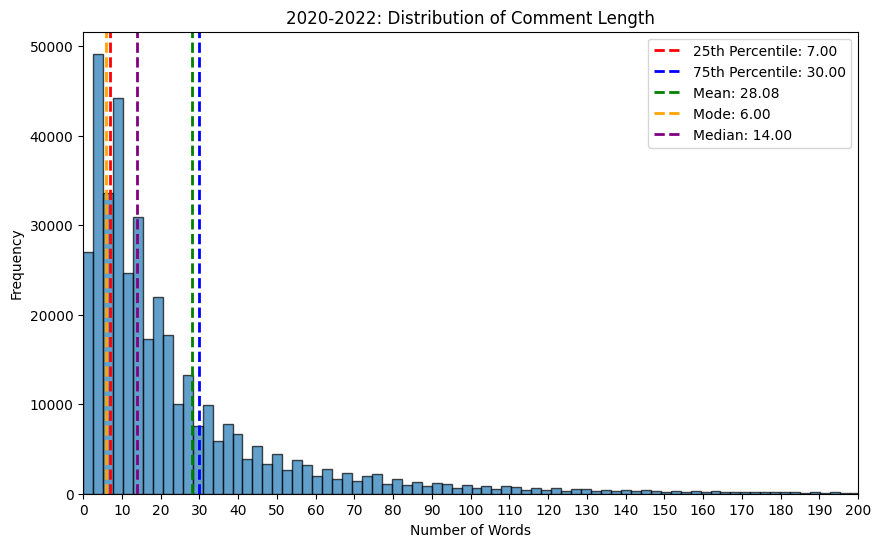

In [18]:
# Plot the distribution of word counts
plt.figure(figsize=(10, 6))
plt.hist(reddit_df['word_count'], bins=sqrt_row_count2, edgecolor='black', alpha=0.7) # Number of bins = sq root of total number of rows
plt.title('2020-2022: Distribution of Comment Length')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.xlim(0, 200)  # Set x-axis limits
plt.xticks(np.arange(0, 210, 10))  # Set ticks at intervals of 20
plt.grid(False)

# Add vertical lines for the 25th and 75th percentiles
plt.axvline(percentile_25, color='red', linestyle='dashed', linewidth=2, 
            label=f'25th Percentile: {percentile_25:.2f}')
plt.axvline(percentile_75, color='blue', linestyle='dashed', linewidth=2, 
            label=f'75th Percentile: {percentile_75:.2f}')

# Add vertical lines for mean, mode, and median
plt.axvline(mean_word_count, color='green', linestyle='dashed', linewidth=2, 
            label=f'Mean: {mean_word_count:.2f}')
plt.axvline(mode_word_count, color='orange', linestyle='dashed', linewidth=2, 
            label=f'Mode: {mode_word_count:.2f}')
plt.axvline(median_word_count, color='purple', linestyle='dashed', linewidth=2, 
            label=f'Median: {median_word_count:.2f}')


# Add legend
plt.legend()

plt.show()

# Analysis Over Time

## Visualisation: Yearly Data (2020)

In [19]:
# Keep only rows where the first 4 characters in the 'timestamp' column are '2020'
filtered_df_2020 = reddit_df[reddit_df['timestamp'].str.startswith('2020')]

# Display the filtered DataFrame
filtered_df_2020.head()


,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation,word_count
0,i think most singaporeans dont give a damn who taiwan belong to,2020-04-11 15:49:23,invigo79,/r/singapore/comments/fz7vtl/im_quite_interested_to_know_why_so_many/fn3gbrg/,t3_fz7vtl,t3_fz7vtl,fn3gbrg,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, 'collapsed_reason': None, 'controversiality': 0}",12
1,fair point the secrecy aspect of it slipped my mind,2020-04-03 09:59:08,potatetoe_tractor,/r/singapore/comments/fu3axm/government_to_table_bill_to_ensure_safe_general/fmau5k3/,t3_fu3axm,t1_fmasya5,fmau5k3,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, 'collapsed_reason': None, 'controversiality': 0}",10
2,range,2020-02-15 15:07:03,CrossfittJesus,/r/singapore/comments/f4ac70/what_is_ps_defense_imprest/fhp05xc/,t3_f4ac70,t3_f4ac70,fhp05xc,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, 'collapsed_reason': None, 'controversiality': 0}",1
3,gt this is binary thinking because you think that im inherently blind and because of the majority privilege\n\ngt this demonstrates your inability to accept opposing views and have no choice but to resort to using ad hominem by casting me into an opposing the others group making it a black and white binary argument in order to have an attempt in giving supposed strength to your argument\n\nwell this is clearly very complicated for you but to bring this back to where i came in the idea of normalizing edmws tone amp tenor just because you think it is anywhere commendable that they bash anyone outside their approved groups\n\nto which all i said was \n\ngt racist against everyone sounds the worst cesspool of assholes then\n\nany other place this would be a open shut point but and here we are with your spirited defense of this mindset,2020-06-04 07:07:39,nomad80,/r/singapore/comments/gw55cx/notoracism/fsu4fyd/,t3_gw55cx,t1_fsu3dsf,fsu4fyd,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, 'collapsed_reason': None, 'controversiality': 0}",149
4,boo boo poor u lmao,2020-10-31 13:52:12,pirorok,/r/singapore/comments/jl6abo/rsingapore_random_discussion_and_small_questions/gap4vkl/,t3_jl6abo,t1_gap4e9y,gap4vkl,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, 'collapsed_reason': None, 'controversiality': 0}",5


In [20]:
# Number of non-null rows in the 'text' column
row_count1_2020 = filtered_df_2020['text'].count() #only counts non-null rows
print(f"Number of rows in the 'text' column: {row_count1_2020}")

# Number of rows (including null rows) in the 'text' column
row_count2_2020 = len(filtered_df_2020['text']) #includes NaN values
print(f"Total number of rows in the 'text' column: {row_count2_2020}") 

# Calculate the square root of row_count2 and round to a whole number
sqrt_row_count2_2020 = round(math.sqrt(row_count2_2020))
print(f"Square root of total number of rows in the 'text' column (rounded): {sqrt_row_count2_2020}")


Number of rows in the 'text' column: 116520
Total number of rows in the 'text' column: 116788
Square root of total number of rows in the 'text' column (rounded): 342


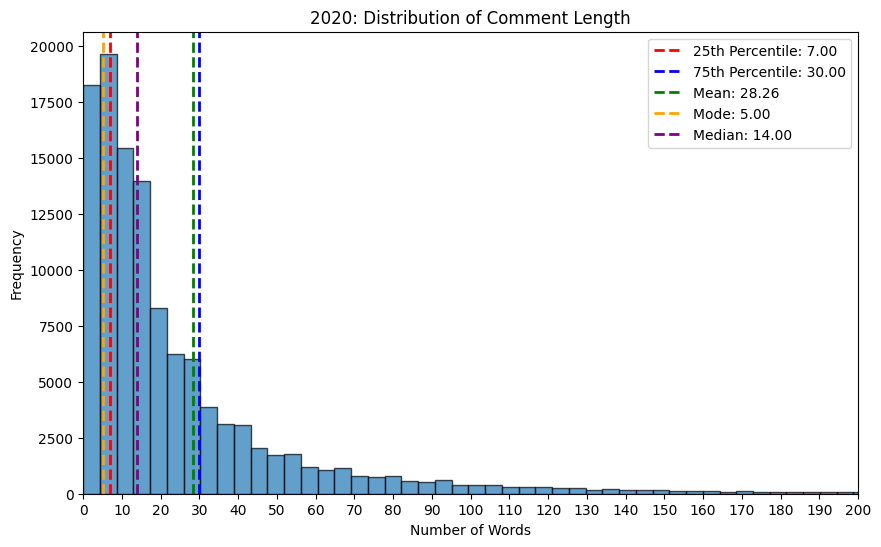

In [21]:
# Calculate statistics for filtered_df_2020
mean_word_count_2020 = filtered_df_2020['word_count'].mean()
mode_word_count_2020 = filtered_df_2020['word_count'].mode()[0]  # Get the first mode value
median_word_count_2020 = filtered_df_2020['word_count'].median()
percentile_25_2020 = filtered_df_2020['word_count'].quantile(0.25)
percentile_75_2020 = filtered_df_2020['word_count'].quantile(0.75)

# Plot the distribution of word counts
plt.figure(figsize=(10, 6))
plt.hist(filtered_df_2020['word_count'], bins=sqrt_row_count2_2020, edgecolor='black', alpha=0.7)  # Number of bins = sq root of total number of rows
plt.title('2020: Distribution of Comment Length')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.xlim(0, 200)  # Set x-axis limits
plt.xticks(np.arange(0, 210, 10))  # Set ticks at intervals of 10
plt.grid(False)

# Add vertical lines for the 25th and 75th percentiles
plt.axvline(percentile_25_2020, color='red', linestyle='dashed', linewidth=2, 
            label=f'25th Percentile: {percentile_25_2020:.2f}')
plt.axvline(percentile_75_2020, color='blue', linestyle='dashed', linewidth=2, 
            label=f'75th Percentile: {percentile_75_2020:.2f}')

# Add vertical lines for mean, mode, and median
plt.axvline(mean_word_count_2020, color='green', linestyle='dashed', linewidth=2, 
            label=f'Mean: {mean_word_count_2020:.2f}')
plt.axvline(mode_word_count_2020, color='orange', linestyle='dashed', linewidth=2, 
            label=f'Mode: {mode_word_count_2020:.2f}')
plt.axvline(median_word_count_2020, color='purple', linestyle='dashed', linewidth=2, 
            label=f'Median: {median_word_count_2020:.2f}')

# Add legend
plt.legend()

# Show the plot
plt.show()

## Visualisation: Yearly Data (2021)

In [22]:
# Keep only rows where the first 4 characters in the 'timestamp' column are '2021'
filtered_df_2021 = reddit_df[reddit_df['timestamp'].str.startswith('2021')]

# Display the filtered DataFrame
filtered_df_2021.head()

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation,word_count
6,because she is angry that despite all the hard times she had stood through with him he seemed to have moved on pretty damn fast from their divorce getting a new gf and dog she feels like he didnt even care about all that she went through and isnt mourning the end of their relationship while she is stuck there\n\ngood news for her is that i read somewhere once that while guys rebound faster long term they take it harder while women take much longer to get through the breakdown of a relationship yet end up happier in the long run\n\nbad news for her is that she does not look good shitting all over female talents just because she cant trust her husband,2021-10-24 20:03:39,StareintotheSun2020,/r/singapore/comments/qeu001/deleted_by_user/hhwhn2u/,t3_qeu001,t1_hhw1usq,hhwhn2u,t5_2qh8c,"{'collapsed_reason_code': None, 'collapsed_reason': None, 'collapsed': False, 'controversiality': 1}",125
9,delta counterpart,2021-07-07 15:55:34,SamBellFromSarang,/r/SingaporeRaw/comments/ofac8p/indian_government_there_are_650000_indians_in/h4d6tcs/,t3_ofac8p,t1_h4bapip,h4d6tcs,t5_xnx04,"{'collapsed_reason_code': None, 'collapsed_reason': None, 'collapsed': False, 'controversiality': 0}",2
10,booster shots on the da house,2021-09-15 16:02:33,Bcpjw,/r/singapore/comments/pos7dm/807_new_covid19_cases_804_local_inc_34_dorm_3/hcyq9cf/,t3_pos7dm,t3_pos7dm,hcyq9cf,t5_2qh8c,"{'collapsed_reason_code': None, 'collapsed_reason': None, 'collapsed': False, 'controversiality': 0}",6
11,thankfully i dont even frequent places in sg where this is common please dont let this ill culture permeate outside downtown,2021-03-27 14:01:47,Silverelfz,/r/singapore/comments/mebnp7/whats_the_most_singaporean_thing_you_do_while/gsg782b/,t3_mebnp7,t1_gsfs9vc,gsg782b,t5_2qh8c,"{'collapsed_reason_code': None, 'collapsed_reason': None, 'collapsed': False, 'controversiality': 0}",21
14,i wonder neighbour,2021-04-30 08:32:47,CircularCausality,/r/singapore/comments/n1pdn0/woman_charged_with_meeting_man_10_times_during/gwehod4/,t3_n1pdn0,t1_gwehggu,gwehod4,t5_2qh8c,"{'collapsed_reason': None, 'author_is_blocked': False, 'collapsed_reason_code': None, 'collapsed': False, 'controversiality': 0}",3


In [23]:
# Number of non-null rows in the 'text' column
row_count1_2021 = filtered_df_2021['text'].count() #only counts non-null rows
print(f"Number of rows in the 'text' column: {row_count1_2021}")

# Number of rows (including null rows) in the 'text' column
row_count2_2021 = len(filtered_df_2021['text']) #includes NaN values
print(f"Total number of rows in the 'text' column: {row_count2_2021}") 

# Calculate the square root of row_count2 and round to a whole number
sqrt_row_count2_2021 = round(math.sqrt(row_count2_2021))
print(f"Square root of total number of rows in the 'text' column (rounded): {sqrt_row_count2_2021}")


Number of rows in the 'text' column: 119523
Total number of rows in the 'text' column: 119917
Square root of total number of rows in the 'text' column (rounded): 346


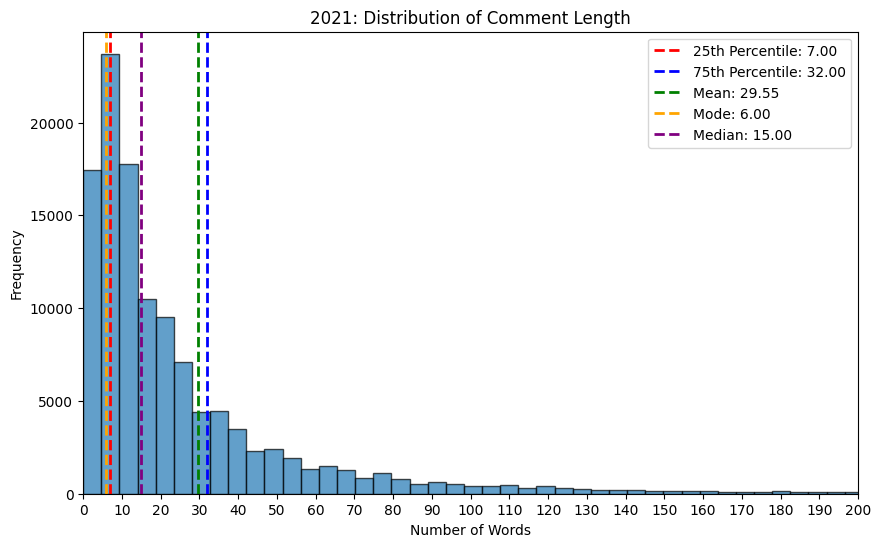

In [24]:
# Calculate statistics for filtered_df_2020
mean_word_count_2021 = filtered_df_2021['word_count'].mean()
mode_word_count_2021 = filtered_df_2021['word_count'].mode()[0]  # Get the first mode value
median_word_count_2021 = filtered_df_2021['word_count'].median()
percentile_25_2021 = filtered_df_2021['word_count'].quantile(0.25)
percentile_75_2021 = filtered_df_2021['word_count'].quantile(0.75)

# Plot the distribution of word counts
plt.figure(figsize=(10, 6))
plt.hist(filtered_df_2021['word_count'], bins=sqrt_row_count2_2021, edgecolor='black', alpha=0.7)  # Number of bins = sq root of total number of rows
plt.title('2021: Distribution of Comment Length')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.xlim(0, 200)  # Set x-axis limits
plt.xticks(np.arange(0, 210, 10))  # Set ticks at intervals of 10
plt.grid(False)

# Add vertical lines for the 25th and 75th percentiles
plt.axvline(percentile_25_2021, color='red', linestyle='dashed', linewidth=2, 
            label=f'25th Percentile: {percentile_25_2021:.2f}')
plt.axvline(percentile_75_2021, color='blue', linestyle='dashed', linewidth=2, 
            label=f'75th Percentile: {percentile_75_2021:.2f}')

# Add vertical lines for mean, mode, and median
plt.axvline(mean_word_count_2021, color='green', linestyle='dashed', linewidth=2, 
            label=f'Mean: {mean_word_count_2021:.2f}')
plt.axvline(mode_word_count_2021, color='orange', linestyle='dashed', linewidth=2, 
            label=f'Mode: {mode_word_count_2021:.2f}')
plt.axvline(median_word_count_2021, color='purple', linestyle='dashed', linewidth=2, 
            label=f'Median: {median_word_count_2021:.2f}')

# Add legend
plt.legend()

# Show the plot
plt.show()

## Visualisation: Yearly Data (2022)

In [25]:
# Keep only rows where the first 4 characters in the 'timestamp' column are '2022'
filtered_df_2022 = reddit_df[reddit_df['timestamp'].str.startswith('2022')]

# Display the filtered DataFrame
filtered_df_2022.head()

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation,word_count
236706,de kitty always like wan scratch moi wen limpeh touch de pigu bt after that come sayang my legdis one like my body temp hot n cold,2022-10-03 12:46:40,japchaeonescalator,/r/singapore/comments/xu163c/rsingapore_random_discussion_and_small_questions/iqvksqb/,t3_xu163c,t3_xu163c,iqvksqb,t5_2qh8c,"{'controversiality': 0, 'collapsed_reason_code': None, 'collapsed': False, 'collapsed_reason': None}",27
236707,mans going through it,2022-05-19 09:43:43,PanadolSZN,/r/SingaporeRaw/comments/usds9t/1001_pm_screaming_for_no_reason/i96lzs9/,t3_usds9t,t3_usds9t,i96lzs9,t5_xnx04,"{'controversiality': 0, 'collapsed_reason_code': None, 'collapsed': False, 'collapsed_reason': None}",4
236709,this man think he very satki he forgot that bus is also mercedes and the cc even bigger,2022-11-06 14:29:56,mulder_and_sekali,/r/singapore/comments/yney41/man_snatches_phone_from_bus_driver_and_discard_it/ivaafaw/,t3_yney41,t3_yney41,ivaafaw,t5_2qh8c,"{'controversiality': 0, 'collapsed_reason_code': None, 'collapsed': False, 'collapsed_reason': None}",18
236711,getting a pes f is dealing with the problem imo,2022-04-08 06:00:54,Gungalley,/r/singapore/comments/tyvba1/anyone_here_that_exempt_for_ns_for_any_reason/i3v77co/,t3_tyvba1,t1_i3v2xkf,i3v77co,t5_2qh8c,"{'controversiality': 1, 'collapsed_reason_code': None, 'collapsed': False, 'collapsed_reason': None}",10
236712,we earn money by linking consumers to companies selling the products like amazon,2022-05-02 13:00:17,N1_Procrastinator,/r/singapore/comments/ugais3/rsingapore_random_discussion_and_small_questions/i70u0e3/,t3_ugais3,t1_i70tgdj,i70u0e3,t5_2qh8c,"{'controversiality': 0, 'collapsed_reason_code': None, 'collapsed': False, 'collapsed_reason': None}",13


In [26]:
# Number of non-null rows in the 'text' column
row_count1_2022 = filtered_df_2022['text'].count() #only counts non-null rows
print(f"Number of rows in the 'text' column: {row_count1_2022}")

# Number of rows (including null rows) in the 'text' column
row_count2_2022 = len(filtered_df_2022['text']) #includes NaN values
print(f"Total number of rows in the 'text' column: {row_count2_2022}") 

# Calculate the square root of row_count2 and round to a whole number
sqrt_row_count2_2022 = round(math.sqrt(row_count2_2022))
print(f"Square root of total number of rows in the 'text' column (rounded): {sqrt_row_count2}")


Number of rows in the 'text' column: 90605
Total number of rows in the 'text' column: 90866
Square root of total number of rows in the 'text' column (rounded): 630


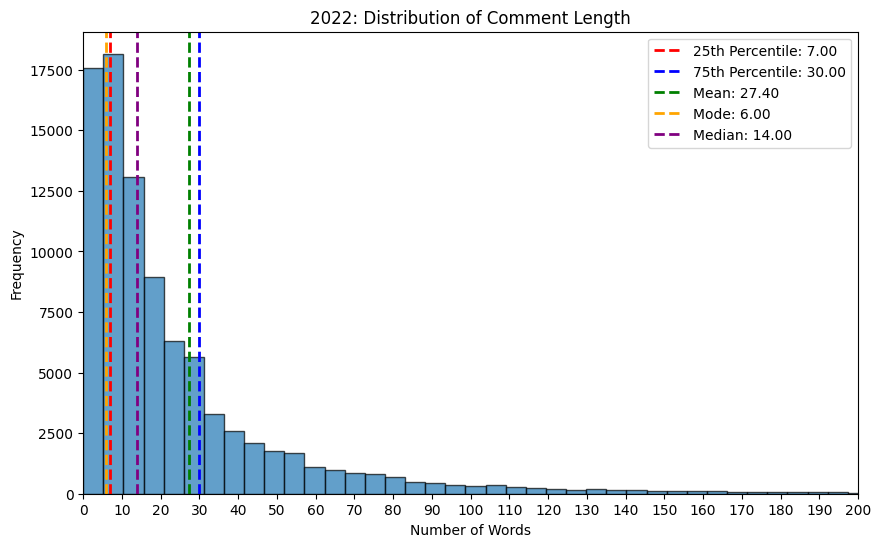

In [27]:
# Calculate statistics for filtered_df_2022
mean_word_count_2022 = filtered_df_2022['word_count'].mean()
mode_word_count_2022 = filtered_df_2022['word_count'].mode()[0]  # Get the first mode value
median_word_count_2022 = filtered_df_2022['word_count'].median()
percentile_25_2022 = filtered_df_2022['word_count'].quantile(0.25)
percentile_75_2022 = filtered_df_2022['word_count'].quantile(0.75)

# Plot the distribution of word counts
plt.figure(figsize=(10, 6))
plt.hist(filtered_df_2022['word_count'], bins=sqrt_row_count2_2022, edgecolor='black', alpha=0.7)  # Number of bins = sq root of total number of rows
plt.title('2022: Distribution of Comment Length')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.xlim(0, 200)  # Set x-axis limits
plt.xticks(np.arange(0, 210, 10))  # Set ticks at intervals of 10
plt.grid(False)

# Add vertical lines for the 25th and 75th percentiles
plt.axvline(percentile_25_2022, color='red', linestyle='dashed', linewidth=2, 
            label=f'25th Percentile: {percentile_25_2022:.2f}')
plt.axvline(percentile_75_2022, color='blue', linestyle='dashed', linewidth=2, 
            label=f'75th Percentile: {percentile_75_2022:.2f}')

# Add vertical lines for mean, mode, and median
plt.axvline(mean_word_count_2022, color='green', linestyle='dashed', linewidth=2, 
            label=f'Mean: {mean_word_count_2022:.2f}')
plt.axvline(mode_word_count_2022, color='orange', linestyle='dashed', linewidth=2, 
            label=f'Mode: {mode_word_count_2022:.2f}')
plt.axvline(median_word_count_2022, color='purple', linestyle='dashed', linewidth=2, 
            label=f'Median: {median_word_count_2022:.2f}')

# Add legend
plt.legend()

# Show the plot
plt.show()


## Trend Over Time

In [28]:
# Keep only rows where the first 4 characters in the 'timestamp' column are '2023'
filtered_df_2023 = reddit_df[reddit_df['timestamp'].str.startswith('2023')]

# Display the filtered DataFrame
filtered_df_2023.head()

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation,word_count
236705,her nehneh so big she might accidentally cut them off with her swordor at least sliced off her own nipples,2023-02-07 13:26:10,Black_Mondeo,/r/SingaporeRaw/comments/10vxkgx/keppel_bribery_indranee_rajah_crosses_swords_with/j7kgy6s/,t3_10vxkgx,t3_10vxkgx,j7kgy6s,t5_xnx04,"{'controversiality': 0, 'collapsed_reason_code': 'LOW_SCORE', 'collapsed': True, 'collapsed_reason': 'comment score below threshold'}",20
236708,trickling down economy,2023-02-05 01:01:14,MisoMesoMilo,/r/singapore/comments/10thi2f/monthly_rent_for_4room_tiong_bahru_flat_reaches/j795kpj/,t3_10thi2f,t3_10thi2f,j795kpj,t5_2qh8c,"{'controversiality': 1, 'collapsed_reason_code': None, 'collapsed': False, 'collapsed_reason': None}",3
236710,haha no la,2023-05-27 12:23:59,tictactorz,/r/singapore/comments/13spsi3/rsingapore_random_discussion_and_small_questions/jltct5r/,t3_13spsi3,t1_jlt79qg,jltct5r,t5_2qh8c,"{'banned_at_utc': None, 'mod_reason_by': None, 'mod_reason_title': None, 'banned_by': None, 'num_reports': 0, 'collapsed_reason_code': None, 'controversiality': 0, 'author_is_blocked': False, 'mod_note': None, 'collapsed': False, 'report_reasons': [], 'mod_reports': [], 'removal_reason': None, 'user_reports': [], 'collapsed_reason': None}",3
236713,the comments is epic i am so curious where all the downvoters coming from all at once to fully support the proven harmful vaccines \n\nall my life i thought we are rational human beings that want to preserve life i am not sure anymore \n\nquestion to all the downvoters why are you all supporting harm,2023-09-20 12:36:30,Craft_Severe,/r/SingaporeRaw/comments/16ls014/doctors_say_need_to_take_more_will_you_take_more/k1epcqb/,t3_16ls014,t3_16ls014,k1epcqb,t5_xnx04,"{'banned_at_utc': None, 'mod_reason_by': None, 'mod_reason_title': None, 'banned_by': None, 'num_reports': 0, 'collapsed_reason_code': None, 'controversiality': 0, 'author_is_blocked': False, 'mod_note': None, 'collapsed': False, 'report_reasons': [], 'mod_reports': [], 'removal_reason': None, 'user_reports': [], 'collapsed_reason': None}",55
236714,this one i agree with you but it also has to do with our healthcare capacity in general healthcare as a sector is really no worklife balance one\n\nthat said the mental health sector is slightly better but there arent enough counsellors because emotional and mental burn out is real,2023-02-28 10:59:31,kopi_gremlin,/r/singapore/comments/11d3ent/commentary_mental_healthcare_should_be_for_all/jac4nxz/,t3_11d3ent,t1_jaaude7,jac4nxz,t5_2qh8c,"{'controversiality': 0, 'collapsed_reason_code': None, 'collapsed': False, 'collapsed_reason': None}",50


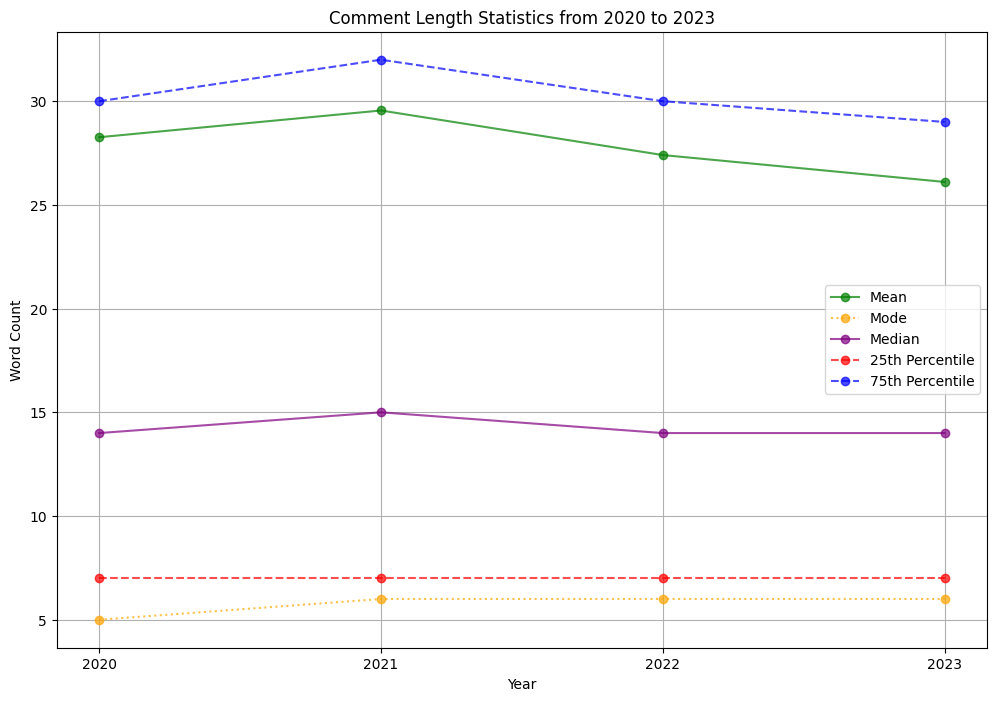

In [29]:
mean_word_count_2023 = filtered_df_2023['word_count'].mean()
mode_word_count_2023 = filtered_df_2023['word_count'].mode()[0]
median_word_count_2023 = filtered_df_2023['word_count'].median()
percentile_25_2023 = filtered_df_2023['word_count'].quantile(0.25)
percentile_75_2023 = filtered_df_2023['word_count'].quantile(0.75)
row_count2_2023 = len(filtered_df_2023['text'])


# Data for the line plot
years = [2020, 2021, 2022, 2023]  
mean_word_counts = [mean_word_count_2020, mean_word_count_2021, mean_word_count_2022, mean_word_count_2023]  # Added mean for 2023
mode_word_counts = [mode_word_count_2020, mode_word_count_2021, mode_word_count_2022, mode_word_count_2023]  # Added mode for 2023
median_word_counts = [median_word_count_2020, median_word_count_2021, median_word_count_2022, median_word_count_2023]  # Added median for 2023
percentile_25_counts = [percentile_25_2020, percentile_25_2021, percentile_25_2022, percentile_25_2023]  # Added 25th percentile for 2023
percentile_75_counts = [percentile_75_2020, percentile_75_2021, percentile_75_2022, percentile_75_2023]  # Added 75th percentile for 2023

# Plotting the data
plt.figure(figsize=(12, 8))

# Plot mean, mode, median, and percentiles
plt.plot(years, mean_word_counts, marker='o', linestyle='-', color='green', label='Mean', alpha=0.7)
plt.plot(years, mode_word_counts, marker='o', linestyle=':', color='orange', label='Mode', alpha=0.7)
plt.plot(years, median_word_counts, marker='o', linestyle='-', color='purple', label='Median', alpha=0.7)
plt.plot(years, percentile_25_counts, marker='o', linestyle='--', color='red', label='25th Percentile', alpha=0.7)
plt.plot(years, percentile_75_counts, marker='o', linestyle='--', color='blue', label='75th Percentile', alpha=0.7)

# Adding titles and labels
plt.title('Comment Length Statistics from 2020 to 2023')  # Updated title to include 2023
plt.xlabel('Year')
plt.ylabel('Word Count')
plt.xticks(years)  # Set x-ticks to be the years
plt.grid(True)

# Add legend
plt.legend()

# Show the plot
plt.show()



## Length of Comments Overtime: Mean length of comments per month grouped by year.

In [30]:
reddit_df_2 = reddit_df.copy()

In [31]:
#ensure timestamp column is datetime object
reddit_df_2['timestamp'] = pd.to_datetime(reddit_df_2['timestamp'])

# create 2 new columns in reddit_df
reddit_df_2['year'] = reddit_df_2['timestamp'].dt.year
reddit_df_2['month'] = reddit_df_2['timestamp'].dt.month

In [32]:
reddit_df_2.head()

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation,word_count,year,month
0,i think most singaporeans dont give a damn who taiwan belong to,2020-04-11 15:49:23,invigo79,/r/singapore/comments/fz7vtl/im_quite_interested_to_know_why_so_many/fn3gbrg/,t3_fz7vtl,t3_fz7vtl,fn3gbrg,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, 'collapsed_reason': None, 'controversiality': 0}",12,2020,4
1,fair point the secrecy aspect of it slipped my mind,2020-04-03 09:59:08,potatetoe_tractor,/r/singapore/comments/fu3axm/government_to_table_bill_to_ensure_safe_general/fmau5k3/,t3_fu3axm,t1_fmasya5,fmau5k3,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, 'collapsed_reason': None, 'controversiality': 0}",10,2020,4
2,range,2020-02-15 15:07:03,CrossfittJesus,/r/singapore/comments/f4ac70/what_is_ps_defense_imprest/fhp05xc/,t3_f4ac70,t3_f4ac70,fhp05xc,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, 'collapsed_reason': None, 'controversiality': 0}",1,2020,2
3,gt this is binary thinking because you think that im inherently blind and because of the majority privilege\n\ngt this demonstrates your inability to accept opposing views and have no choice but to resort to using ad hominem by casting me into an opposing the others group making it a black and white binary argument in order to have an attempt in giving supposed strength to your argument\n\nwell this is clearly very complicated for you but to bring this back to where i came in the idea of normalizing edmws tone amp tenor just because you think it is anywhere commendable that they bash anyone outside their approved groups\n\nto which all i said was \n\ngt racist against everyone sounds the worst cesspool of assholes then\n\nany other place this would be a open shut point but and here we are with your spirited defense of this mindset,2020-06-04 07:07:39,nomad80,/r/singapore/comments/gw55cx/notoracism/fsu4fyd/,t3_gw55cx,t1_fsu3dsf,fsu4fyd,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, 'collapsed_reason': None, 'controversiality': 0}",149,2020,6
4,boo boo poor u lmao,2020-10-31 13:52:12,pirorok,/r/singapore/comments/jl6abo/rsingapore_random_discussion_and_small_questions/gap4vkl/,t3_jl6abo,t1_gap4e9y,gap4vkl,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, 'collapsed_reason': None, 'controversiality': 0}",5,2020,10


In [33]:
# count average length of comments by year and month 
ave_length_of_comment_per_month_by_year_df = reddit_df_2.groupby(['year', 'month'])['word_count'].mean().reset_index()

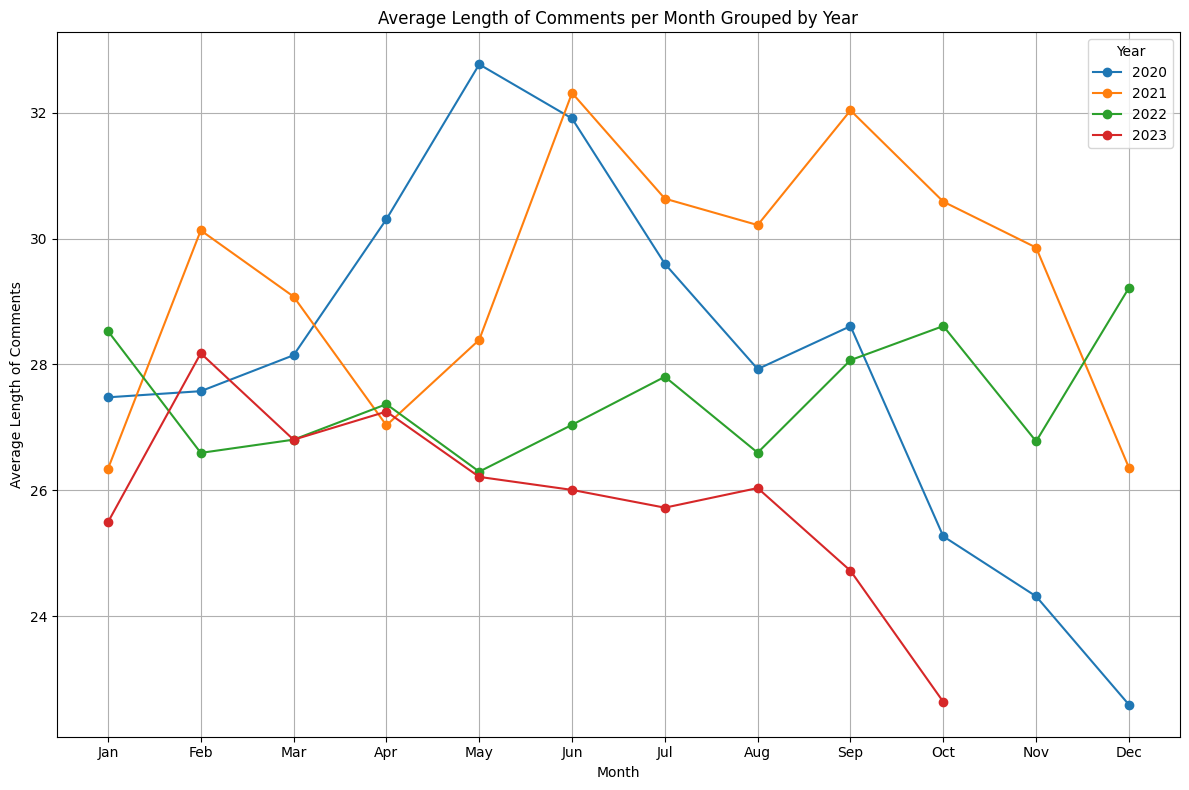

In [34]:
# Plotting
plt.figure(figsize=(12, 8))

# Loop through each year and plot number of comments per month
for year in ave_length_of_comment_per_month_by_year_df['year'].unique():
    data_by_year = ave_length_of_comment_per_month_by_year_df[ave_length_of_comment_per_month_by_year_df['year'] == year]
    plt.plot(data_by_year['month'], data_by_year['word_count'], marker='o', label=str(year))

# Customizing the plot
plt.xlabel('Month')
plt.ylabel('Average Length of Comments')
plt.title('Average Length of Comments per Month Grouped by Year')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

## Length of Comments Overtime: Mean length of comments per month grouped by subreddit.

In [35]:
reddit_df_3 = reddit_df.copy()

In [36]:
# Define conditions
conditions = [
    reddit_df_3['link'].str.startswith('/r/singapore/'), 
    reddit_df_3['link'].str.startswith('/r/SingaporeRaw/'),  
    reddit_df_3['link'].str.startswith('/r/singaporehappenings/')
]

# Define corresponding values
choices = ['r/Singapore', 'r/SingaporeRaw', 'r/SingaporeHappenings']

# Add a new column based on the conditions
reddit_df_3['subreddit'] = np.select(conditions, choices, default='Unknown')

In [37]:
reddit_df_3.head()

,text,timestamp,username,link,link_id,parent_id,id,subreddit_id,moderation,word_count,subreddit
0,i think most singaporeans dont give a damn who taiwan belong to,2020-04-11 15:49:23,invigo79,/r/singapore/comments/fz7vtl/im_quite_interested_to_know_why_so_many/fn3gbrg/,t3_fz7vtl,t3_fz7vtl,fn3gbrg,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, 'collapsed_reason': None, 'controversiality': 0}",12,r/Singapore
1,fair point the secrecy aspect of it slipped my mind,2020-04-03 09:59:08,potatetoe_tractor,/r/singapore/comments/fu3axm/government_to_table_bill_to_ensure_safe_general/fmau5k3/,t3_fu3axm,t1_fmasya5,fmau5k3,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, 'collapsed_reason': None, 'controversiality': 0}",10,r/Singapore
2,range,2020-02-15 15:07:03,CrossfittJesus,/r/singapore/comments/f4ac70/what_is_ps_defense_imprest/fhp05xc/,t3_f4ac70,t3_f4ac70,fhp05xc,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, 'collapsed_reason': None, 'controversiality': 0}",1,r/Singapore
3,gt this is binary thinking because you think that im inherently blind and because of the majority privilege\n\ngt this demonstrates your inability to accept opposing views and have no choice but to resort to using ad hominem by casting me into an opposing the others group making it a black and white binary argument in order to have an attempt in giving supposed strength to your argument\n\nwell this is clearly very complicated for you but to bring this back to where i came in the idea of normalizing edmws tone amp tenor just because you think it is anywhere commendable that they bash anyone outside their approved groups\n\nto which all i said was \n\ngt racist against everyone sounds the worst cesspool of assholes then\n\nany other place this would be a open shut point but and here we are with your spirited defense of this mindset,2020-06-04 07:07:39,nomad80,/r/singapore/comments/gw55cx/notoracism/fsu4fyd/,t3_gw55cx,t1_fsu3dsf,fsu4fyd,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, 'collapsed_reason': None, 'controversiality': 0}",149,r/Singapore
4,boo boo poor u lmao,2020-10-31 13:52:12,pirorok,/r/singapore/comments/jl6abo/rsingapore_random_discussion_and_small_questions/gap4vkl/,t3_jl6abo,t1_gap4e9y,gap4vkl,t5_2qh8c,"{'removal_reason': None, 'collapsed': False, 'collapsed_reason': None, 'controversiality': 0}",5,r/Singapore


In [38]:
#ensure timestamp column is datetime object
reddit_df_3['timestamp'] = pd.to_datetime(reddit_df_3['timestamp'])

# create 2 new columns in reddit_df
reddit_df_3['year'] = reddit_df_3['timestamp'].dt.year
reddit_df_3['month'] = reddit_df_3['timestamp'].dt.month

In [39]:
ave_length_of_comment_per_month_by_subreddit_df = reddit_df_3.groupby(['subreddit', 'month'])['word_count'].mean().reset_index()

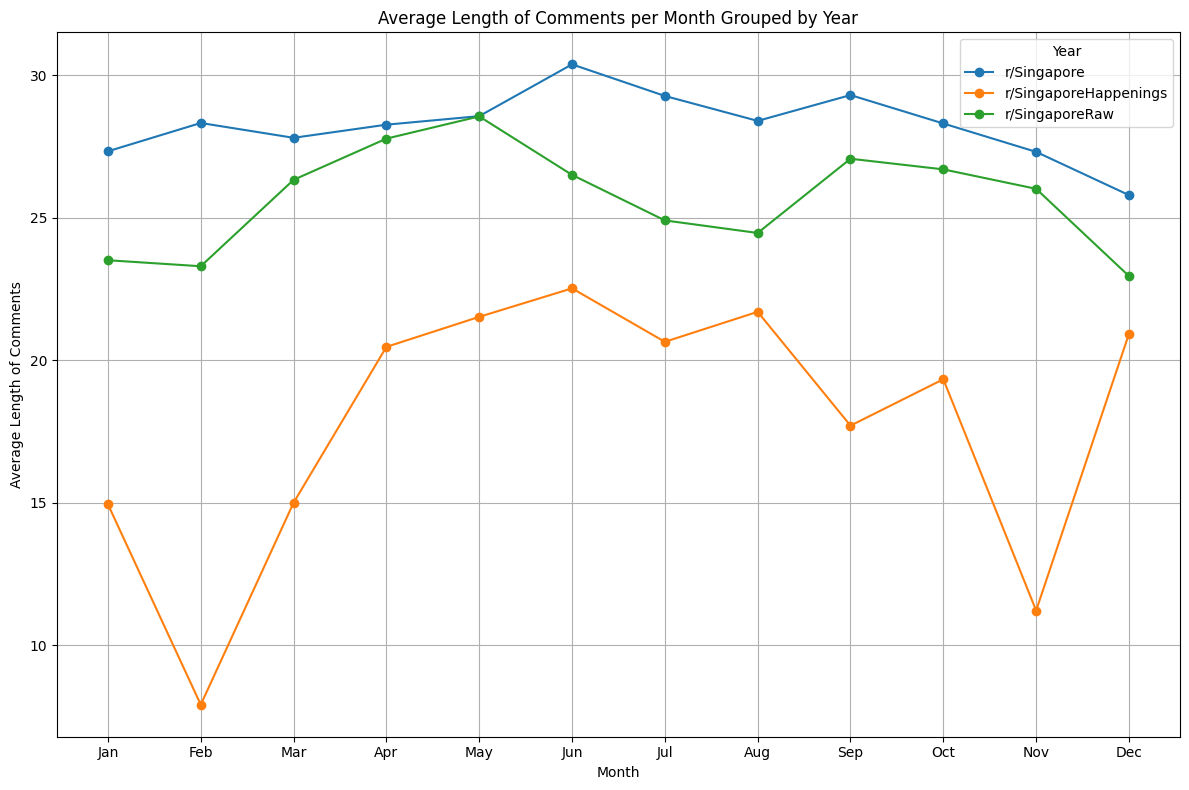

In [40]:
# Plotting
plt.figure(figsize=(12, 8))

# Loop through each year and plot number of comments per month
for subreddit in ave_length_of_comment_per_month_by_subreddit_df['subreddit'].unique():
    data_by_year = ave_length_of_comment_per_month_by_subreddit_df[ave_length_of_comment_per_month_by_subreddit_df['subreddit'] == subreddit]
    plt.plot(data_by_year['month'], data_by_year['word_count'], marker='o', label=str(subreddit))

# Customizing the plot
plt.xlabel('Month')
plt.ylabel('Average Length of Comments')
plt.title('Average Length of Comments per Month Grouped by Year')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()